In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [2]:
df = df.dropna()  # simple approach


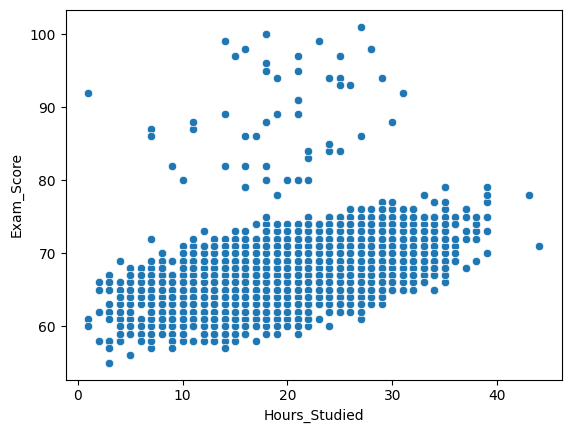

In [4]:
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
# root_mean_squared_error is the new replacement for mean_squared_error(..., squared=False)
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 1.5326995339389773
RMSE: 2.649271726884114
R2: 0.5483304011758173


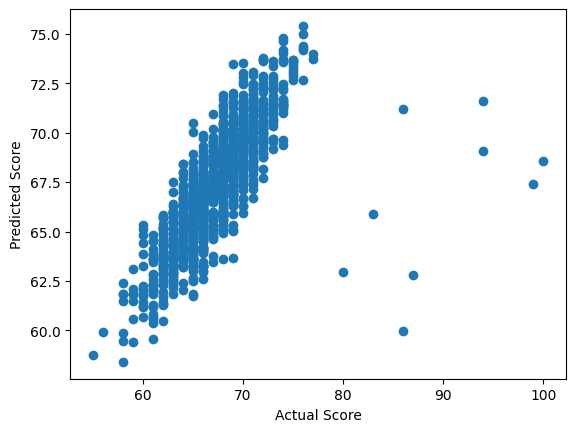

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()
